<a href="https://colab.research.google.com/github/m73abbasi/CS-SBU-DataMining-Msc-projects/blob/main/MohammadRezaAbbasi-98422101/project%201/International_football_matches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#International football matches

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import urllib
from geopy.distance import geodesic

In [ ]:
# read data
ds = pd.read_csv('/content/drive/MyDrive/results.csv')
pd.set_option('display.max_columns',None)
ds.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
# check number of recourd
ds.shape

(42082, 9)

In [ ]:
# check information of data set
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42082 entries, 0 to 42081
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        42082 non-null  object
 1   home_team   42082 non-null  object
 2   away_team   42082 non-null  object
 3   home_score  42082 non-null  int64 
 4   away_score  42082 non-null  int64 
 5   tournament  42082 non-null  object
 6   city        42082 non-null  object
 7   country     42082 non-null  object
 8   neutral     42082 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [ ]:
# basic stat report from numeric data
ds[['date','home_team','away_team','home_score','away_score','tournament','city','country','neutral']].describe()

,home_score,away_score
count,42082.000000,42082.000000
mean,1.743691,1.186541
std,1.752459,1.403957
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [ ]:
# check null data
ds.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [ ]:
# normalizing numeric data
for cols in ds.columns:
  if ds[cols].dtype == 'int64' or ds[cols].dtype == 'float64':
    ds[cols] = ((ds[cols]-ds[cols].mean())/(ds[cols].std()))
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42082 entries, 0 to 42081
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        42082 non-null  object 
 1   home_team   42082 non-null  object 
 2   away_team   42082 non-null  object 
 3   home_score  42082 non-null  float64
 4   away_score  42082 non-null  float64
 5   tournament  42082 non-null  object 
 6   city        42082 non-null  object 
 7   country     42082 non-null  object 
 8   neutral     42082 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.6+ MB


In [ ]:
# delete outlier
for cols in ds.columns:
  if ds[cols].dtype == 'int64' or ds[cols].dtype == 'float64':
    upper_range = ds[cols].mean() + 3 * ds[cols].std()
    lower_range = ds[cols].mean() - 3 * ds[cols].std()
    idx = ds[(ds[cols] > upper_range) | (ds[cols] < lower_range)].index
    ds = ds.drop(idx)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41002 entries, 0 to 42081
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        41002 non-null  object 
 1   home_team   41002 non-null  object 
 2   away_team   41002 non-null  object 
 3   home_score  41002 non-null  float64
 4   away_score  41002 non-null  float64
 5   tournament  41002 non-null  object 
 6   city        41002 non-null  object 
 7   country     41002 non-null  object 
 8   neutral     41002 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.9+ MB


In [ ]:
# reduce number of categories
for cols in ds.columns:
  if ds[cols].dtype == 'object' or ds[cols].dtype == 'bool':
    print('columns : {} , \n {}'.format(cols,ds[cols].value_counts()))

columns : date , 
 2012-02-29    65
2016-03-29    63
2014-03-05    59
2008-03-26    58
2012-11-14    56
              ..
1901-03-30     1
1944-08-25     1
1996-12-20     1
1923-05-20     1
1992-07-09     1
Name: date, Length: 15024, dtype: int64
columns : home_team , 
 Brazil           560
Argentina        542
Mexico           503
Germany          498
England          494
                ... 
Central Spain      1
Micronesia         1
Kabylia            1
Madrid             1
Kiribati           1
Name: home_team, Length: 302, dtype: int64
columns : away_team , 
 Uruguay                      526
Sweden                       522
England                      483
Hungary                      464
Paraguay                     449
                            ... 
Surrey                         1
Barawa                         1
Asturias                       1
Saint Pierre and Miquelon      1
Manchukuo                      1
Name: away_team, Length: 304, dtype: int64
columns : tournament , 
 F

In [ ]:
# Who is the best team of all time
hometeam= list(ds['home_team'].value_counts().head(1).index)
awayteam= list(ds['away_team'].value_counts().head(1).index)
if len(awayteam) > len(hometeam):
  print('best team = ',awayteam)
else:
  print('best team = ',hometeam)

best team =  ['Brazil']


In [ ]:
# Most games are related to which tournament
ds['tournament'].value_counts().head(2).index

Index(['Friendly', 'FIFA World Cup qualification'], dtype='object')

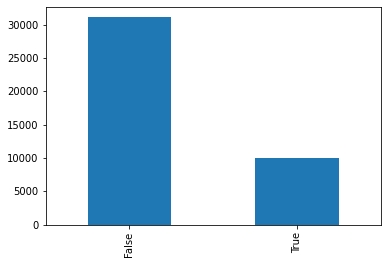

In [ ]:
ds['neutral'].value_counts().plot(kind = 'bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


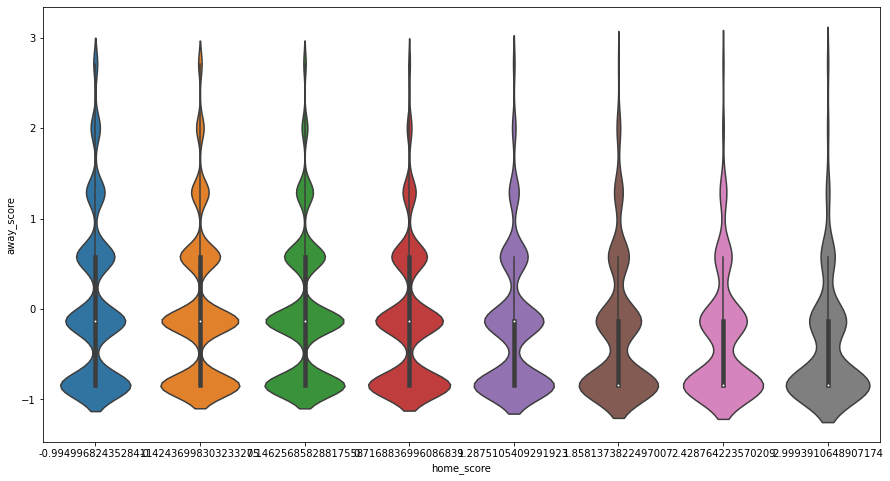

In [ ]:
# relation between home_score & away_score
plt.figure(figsize=(15,8))
sns.violinplot('home_score','away_score', data = ds)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


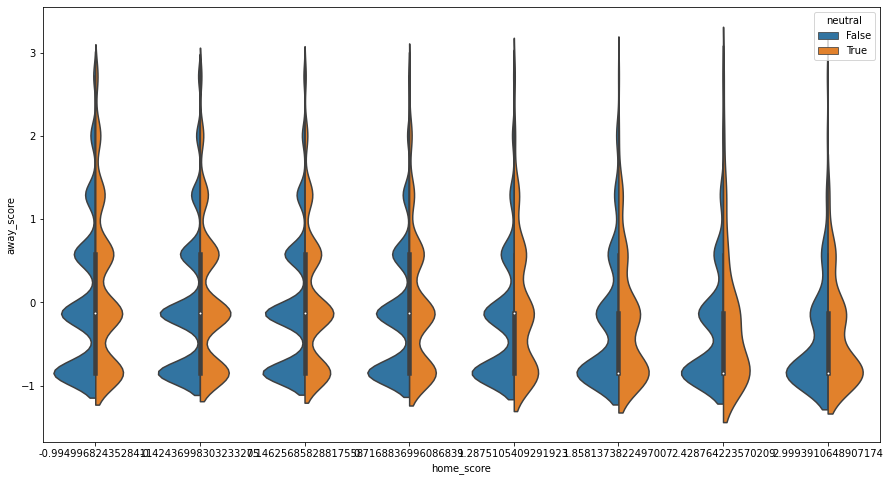

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot('home_score','away_score', hue = 'neutral' , split = True , data = ds)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


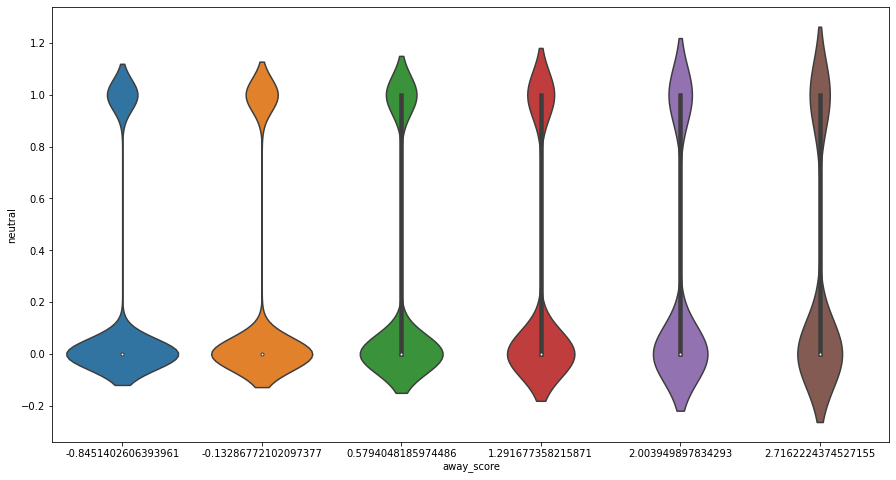

In [ ]:
# relation between away_score & neutral
plt.figure(figsize=(15,8))
sns.violinplot('away_score','neutral', data = ds)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


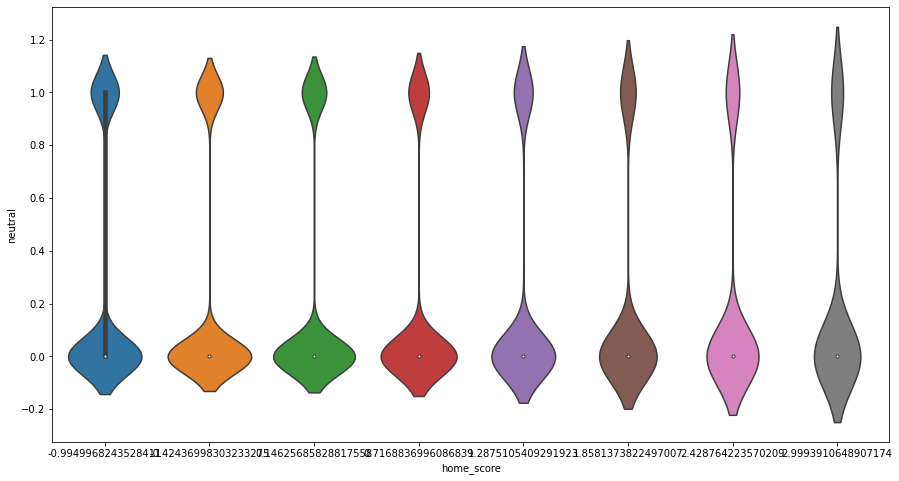

In [ ]:
# relation between home_score & neutral
plt.figure(figsize=(15,8))
sns.violinplot('home_score','neutral', data = ds)

In [ ]:
ds['tournament'].value_counts().unique()

array([16859,  7140,  2532,  1709,   885,   788,   688,   681,   610,
         569,   490,   480,   378,   363,   324,   323,   303,   291,
         286,   281,   270,   257,   248,   233,   231,   162,   159,
         154,   135,   132,   123,   119,   114,   107,    99,    98,
          97,    89,    87,    86,    85,    82,    73,    70,    69,
          64,    60,    59,    54,    53,    52,    48,    47,    37,
          35,    33,    31,    29,    28,    26,    25,    24,    23,
          22,    21,    19,    18,    17,    16,    15,    14,    13,
          12,    11,    10,     9,     8,     7,     6,     4,     2,
           1])

In [ ]:
# Build a column called edit from tournament
Friendly = list(ds['tournament'].value_counts().head(1).index)
def edit(x):
  if x in Friendly:
    return 1
  else:
    return 0
ds['edit']=ds['tournament'].apply(edit)

In [ ]:
ds['edit'].value_counts()

0    24143
1    16859
Name: edit, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


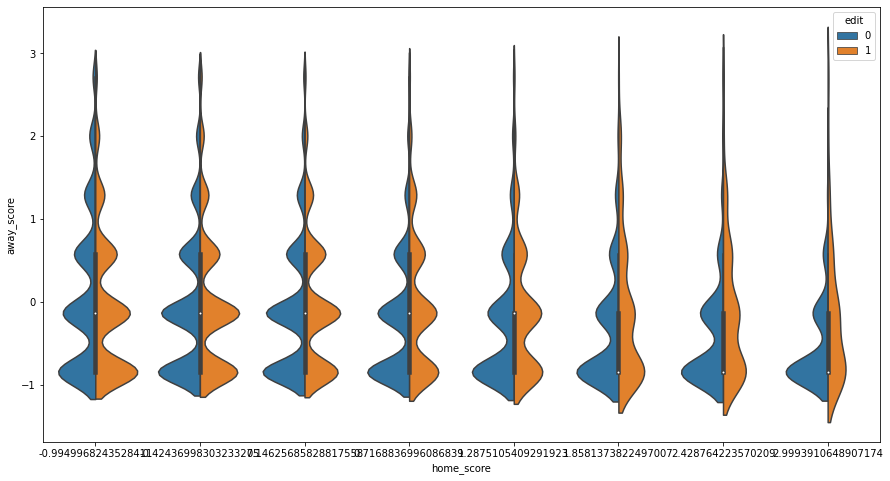

In [ ]:
# relation between home_score & away_score
plt.figure(figsize=(15,8))
sns.violinplot('home_score','away_score', hue = 'edit' , split = True , data = ds)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


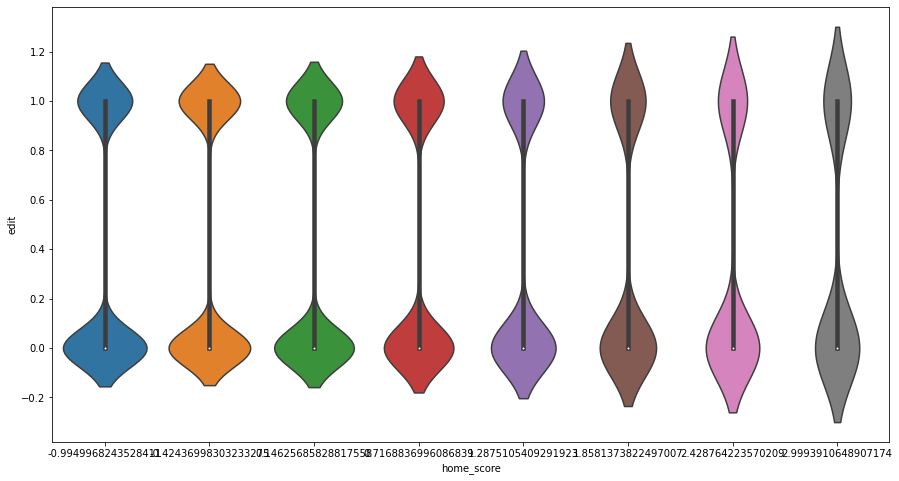

In [ ]:
# relation between home_score & edit
plt.figure(figsize=(15,8))
sns.violinplot('home_score','edit' , data = ds)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


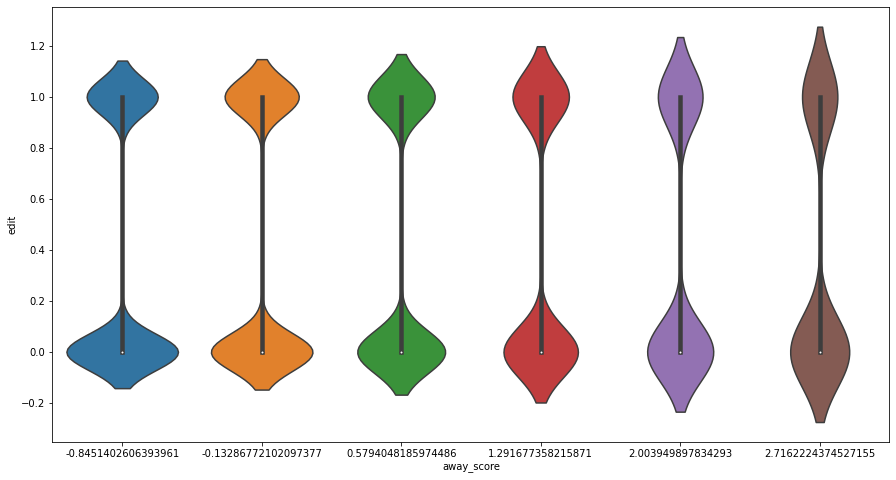

In [ ]:
# relation between away_score & edit
plt.figure(figsize=(15,8))
sns.violinplot('away_score','edit' , data = ds)

In [ ]:
# remove column edit
ds=ds.drop(columns = ['edit'])
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41002 entries, 0 to 42081
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        41002 non-null  object 
 1   home_team   41002 non-null  object 
 2   away_team   41002 non-null  object 
 3   home_score  41002 non-null  float64
 4   away_score  41002 non-null  float64
 5   tournament  41002 non-null  object 
 6   city        41002 non-null  object 
 7   country     41002 non-null  object 
 8   neutral     41002 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 4.1+ MB


In [ ]:
ds['away_score'].value_counts().unique()

array([15309, 13460,  7267,  3125,  1296,   545])

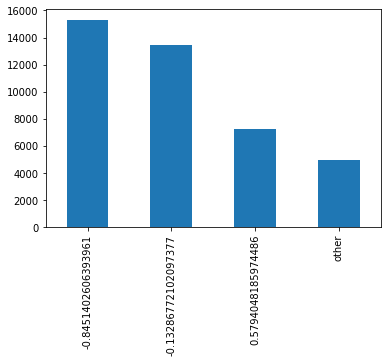

In [ ]:
# Merge several small values ​​from column away_score
others = list(ds['away_score'].value_counts().tail(3).index)
def edit_away_score(x):
  if x in others:
    return 'other'
  else:
    return x
ds['away_score_edit']=ds['away_score'].apply(edit_away_score)
ds = ds.drop(columns=['away_score'])
ds['away_score_edit'].value_counts()*100/len(ds)
ds['away_score_edit'].value_counts().plot(kind='bar')

In [ ]:
ds['home_score'].value_counts().unique()

array([12278,  9837,  9192,  4918,  2537,  1217,   664,   359])

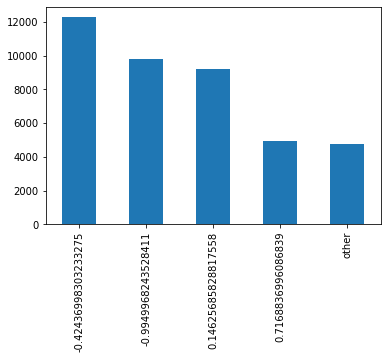

In [ ]:
# Merge several small values ​​from column home_score
others = list(ds['home_score'].value_counts().tail(4).index)
def edit_home_score(x):
  if x in others:
    return 'other'
  else:
    return x
ds['home_score_edit']=ds['home_score'].apply(edit_home_score)
ds = ds.drop(columns=['home_score'])
ds['home_score_edit'].value_counts()*100/len(ds)
ds['home_score_edit'].value_counts().plot(kind='bar')